In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.12.0


In [2]:
import os
import sys
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from keras import applications

import visualkeras

%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras import optimizers

In [3]:
import os

os.environ['KAGGLE_USERNAME'] = "ehsanap"
os.environ['KAGGLE_KEY'] = ""
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [5]:
import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("dogs-vs-cats.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [6]:
print(os.listdir('/'))

['home', 'usr', 'bin', 'sbin', '.file', 'etc', 'var', 'Library', 'System', '.VolumeIcon.icns', 'private', '.vol', 'Users', 'Applications', 'opt', 'dev', 'Volumes', 'tmp', 'cores']


In [7]:
# Upload data and extract the contents

from zipfile import ZipFile

file_name = "train.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('done')

done


In [8]:
IMAGE_FOLDER_PATH = "train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)
WIDTH = 150
HEIGHT = 150

In [9]:
FILE_NAMES[0:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [10]:
targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

In [11]:
dataset.head(10)

image_path target
0   train/dog.8011.jpg    dog
1   train/cat.5077.jpg    cat
2   train/dog.7322.jpg    dog
3   train/cat.2718.jpg    cat
4  train/cat.10151.jpg    cat
5   train/cat.3406.jpg    cat
6   train/dog.1753.jpg    dog
7   train/cat.4369.jpg    cat
8   train/cat.7660.jpg    cat
9   train/dog.5535.jpg    dog

In [12]:
target_counts=dataset['target'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

Number of dogs in the dataset:12500
Number of cats in the dataset:12500


In [13]:
fig = go.Figure(go.Bar(
    x= target_counts.values,
    y=target_counts.index,
    orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()

In [14]:
fig=px.pie(target_counts.head(10),values= 'target', names=dataset['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [18]:
class_id_distributionTrain = dataset['target'].value_counts()
class_id_distributionTrain.head(10)

dog    12500
cat    12500
Name: target, dtype: int64

In [19]:
fig = go.Figure(go.Bar(
    x=class_id_distributionTrain.values,
    y=class_id_distributionTrain.index,
    orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [21]:
fig=px.pie(class_id_distributionTrain.head(10),values= 'target', names=dataset['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [22]:
class_id_distributionTest = dataset['target'].value_counts()
class_id_distributionTest.head(10)

dog    12500
cat    12500
Name: target, dtype: int64

In [23]:
fig = go.Figure(go.Bar(
    x=class_id_distributionTest.values,
    y=class_id_distributionTest.index,
    orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [25]:
fig=px.pie(class_id_distributionTrain.head(10),values= 'target', names=dataset['target'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Cat vs Dog',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

# Model 1

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Metal device set to: Apple M2 Max


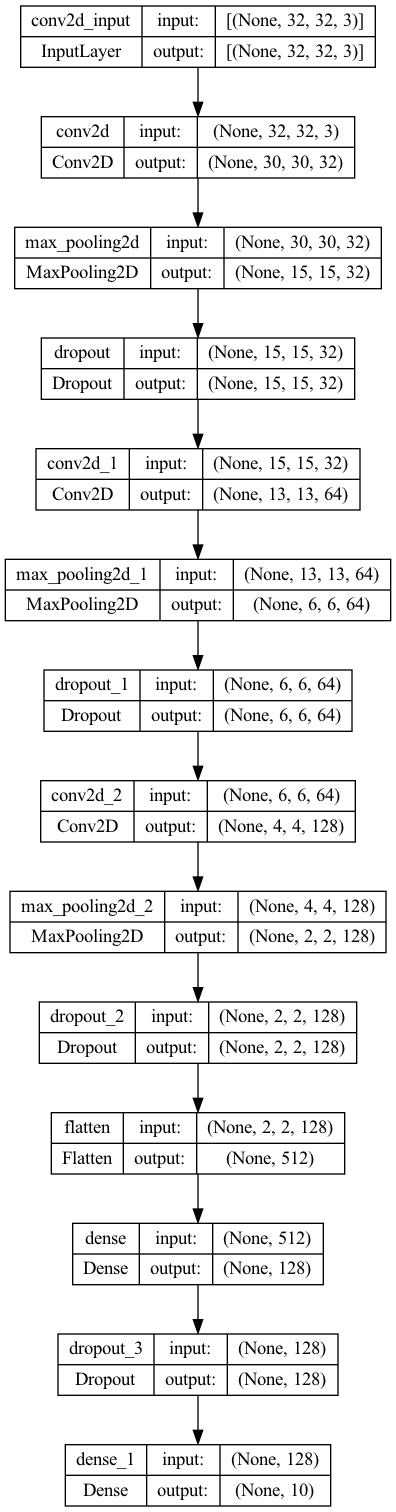

In [27]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)

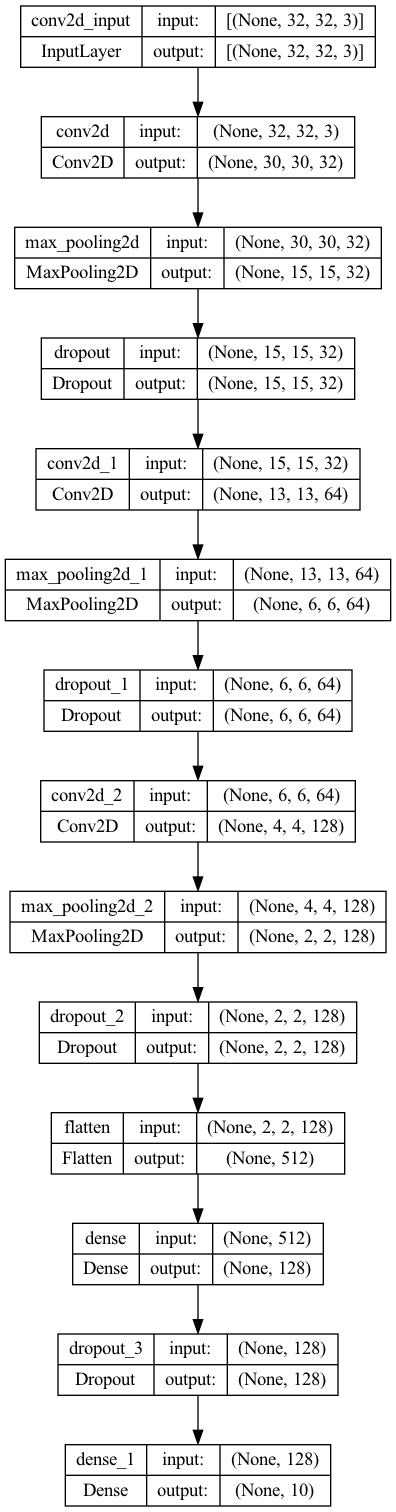

In [28]:
Image(filename='convnet.png')

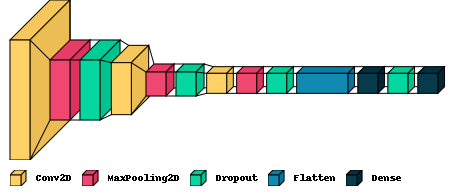

In [29]:
visualkeras.layered_view(model, legend=True)

In [30]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [31]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch_size = 32
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_datagen.fit(x_train)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen.fit(x_test)
History = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=50,
                    validation_data=test_datagen.flow(x_test, y_test, batch_size=batch_size),
                    steps_per_epoch=len(x_train) // batch_size,
                    validation_steps=len(x_test) // batch_size)

Epoch 1/50


2023-04-08 23:19:31.436568: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1562/1562 [==============================] - 17s 11ms/step - loss: 1.7104 - accuracy: 0.3653 - val_loss: 1.4058 - val_accuracy: 0.4999
Epoch 2/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.3989 - accuracy: 0.4916 - val_loss: 1.2052 - val_accuracy: 0.5680
Epoch 3/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.2840 - accuracy: 0.5396 - val_loss: 1.0846 - val_accuracy: 0.6163
Epoch 4/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.2202 - accuracy: 0.5656 - val_loss: 1.0309 - val_accuracy: 0.6400
Epoch 5/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.1673 - accuracy: 0.5882 - val_loss: 0.9572 - val_accuracy: 0.6663
Epoch 6/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.1289 - accuracy: 0.6019 - val_loss: 0.9382 - val_accuracy: 0.6707
Epoch 7/50
1562/1562 [==============================] - 17s 11ms/step - loss: 1.1020 - accuracy: 0.6127 - val_loss: 0.9206 - val_accura

In [35]:
print("Train Accuracy:{:.3f}".format(History.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(History.history['val_accuracy'][-1]))

Train Accuracy:0.711
Test Accuracy:0.748


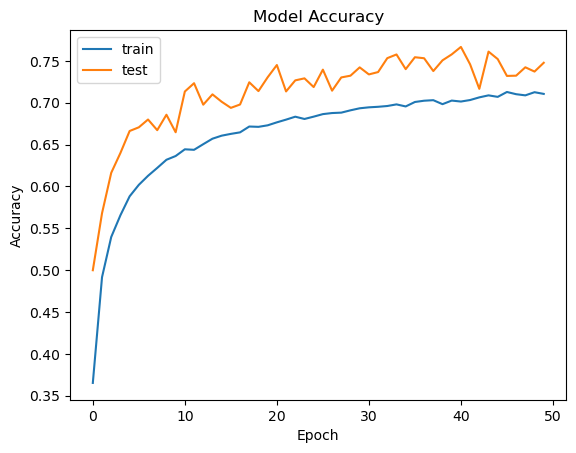

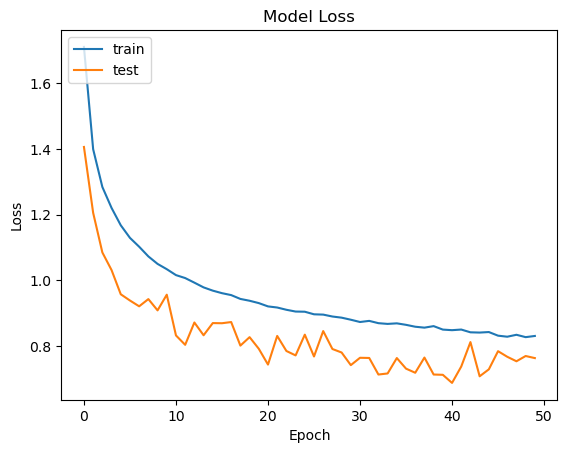

In [36]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Model 2

In [14]:
def get_side(img, side_type, side_size=5):
    height, width, channel=img.shape
    if side_type=="horizontal":
        return np.ones((height,side_size,  channel), dtype=np.float32)*255
        
    return np.ones((side_size, width,  channel), dtype=np.float32)*255

def show_gallery(show="both"):
    n=100
    counter=0
    images=list()
    vertical_images=[]
    rng_state = np.random.get_state()
    np.random.shuffle(full_paths)
    np.random.set_state(rng_state)
    np.random.shuffle(targets)
    for path, target in zip(full_paths, targets):
        if target!=show and show!="both":
            continue
        counter=counter+1
        if counter%100==0:
            break
        #Image loading from disk as JpegImageFile file format
        img=load_img(path, target_size=(WIDTH,HEIGHT))
        #Converting JpegImageFile to numpy array
        img=img_to_array(img)
        
        hside=get_side(img, side_type="horizontal")
        images.append(img)
        images.append(hside)

        if counter%10==0:
            himage=np.hstack((images))
            vside=get_side(himage, side_type="vertical")
            vertical_images.append(himage)
            vertical_images.append(vside)
            
            images=list()

    gallery=np.vstack((vertical_images)) 
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    title={"both":"Dogs and Cats",
          "cat": "Cats",
          "dog": "Dogs"}
    plt.title("100 samples of {} of the dataset".format(title[show]))
    plt.imshow(gallery.astype(np.uint8))

In [24]:
# from zipfile import ZipFile as zipfile

# show_gallery(show="cat")
# show_gallery(show="dog")
# show_gallery(show="both")

In [18]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

In [25]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Metal device set to: Apple M2 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 146, 146, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 32)        0         
                                                                 
 conv2d_2 (Conv2D)    

In [27]:
model.compile(loss="binary_crossentropy", 
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [28]:
dataset_train, dataset_test=train_test_split(dataset,
                                                 test_size=0.2,
                                                 random_state=42)

In [29]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="binary",
                                                     batch_size=150)

Found 20000 validated image filenames belonging to 2 classes.


In [30]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

Found 5000 validated image filenames belonging to 2 classes.


In [32]:
modelHistory=model.fit(train_datagenerator,
                                epochs=50,
                                validation_data=test_datagenerator,
                                validation_steps=dataset_test.shape[0]//150,
                                steps_per_epoch=dataset_train.shape[0]//150
                                )

Epoch 1/50
133/133 [==============================] - 72s 540ms/step - loss: 0.8024 - accuracy: 0.5764 - val_loss: 0.7211 - val_accuracy: 0.5044
Epoch 2/50
133/133 [==============================] - 71s 535ms/step - loss: 0.6871 - accuracy: 0.6066 - val_loss: 0.7145 - val_accuracy: 0.5113
Epoch 3/50
133/133 [==============================] - 71s 530ms/step - loss: 0.6296 - accuracy: 0.6536 - val_loss: 1.1445 - val_accuracy: 0.5103
Epoch 4/50
133/133 [==============================] - 71s 531ms/step - loss: 0.5922 - accuracy: 0.6852 - val_loss: 0.8904 - val_accuracy: 0.6067
Epoch 5/50
133/133 [==============================] - 71s 534ms/step - loss: 0.5577 - accuracy: 0.7145 - val_loss: 0.6384 - val_accuracy: 0.7111
Epoch 6/50
133/133 [==============================] - 71s 534ms/step - loss: 0.5308 - accuracy: 0.7339 - val_loss: 0.6379 - val_accuracy: 0.7255
Epoch 7/50
133/133 [==============================] - 71s 533ms/step - loss: 0.5067 - accuracy: 0.7508 - val_loss: 1.0628 - val_ac

Train Accuracy:0.920
Test Accuracy:0.920


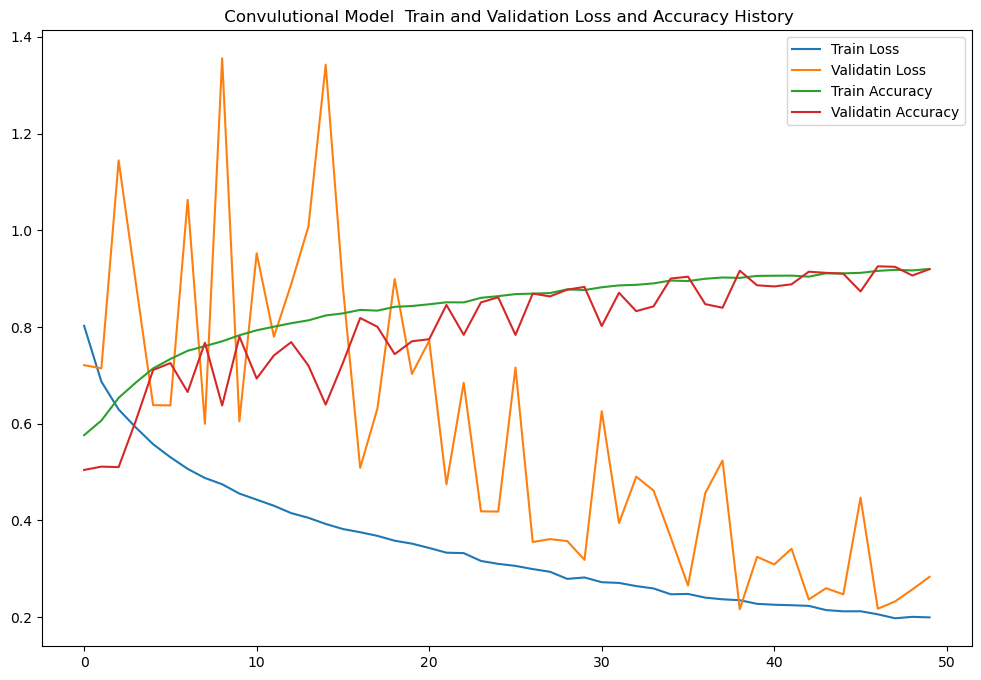

In [33]:
print("Train Accuracy:{:.3f}".format(modelHistory.history['accuracy'][-1]))
print("Test Accuracy:{:.3f}".format(modelHistory.history['val_accuracy'][-1]))
show_model_history(modelHistory=modelHistory, model_name="")

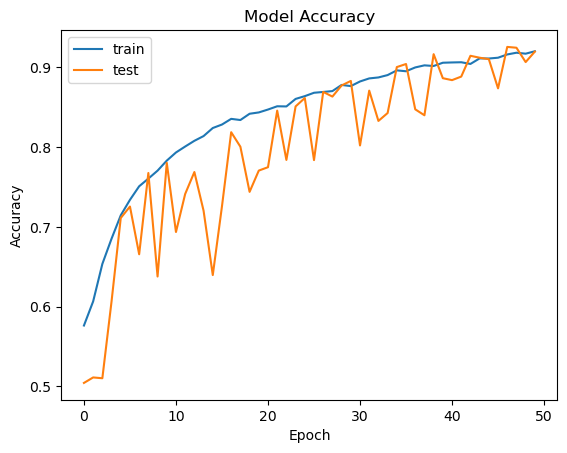

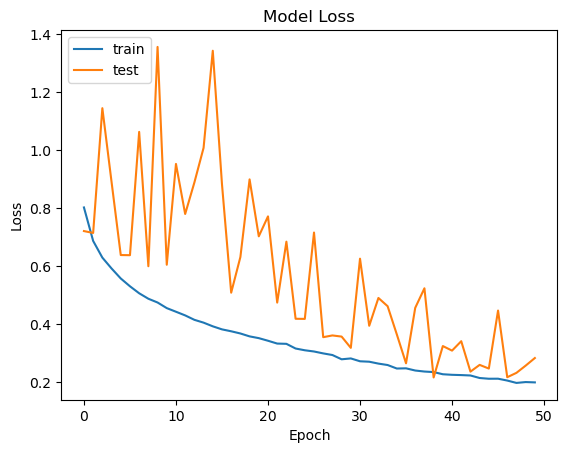

In [148]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Model 3

In [10]:
from PIL import Image
import matplotlib.image as mpimg

# Resizing all the images

In [13]:
#creating a directory for resized images
import os
os.mkdir('resized_image')

In [15]:
original_folder = 'train/'
resized_folder = 'resized_image/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

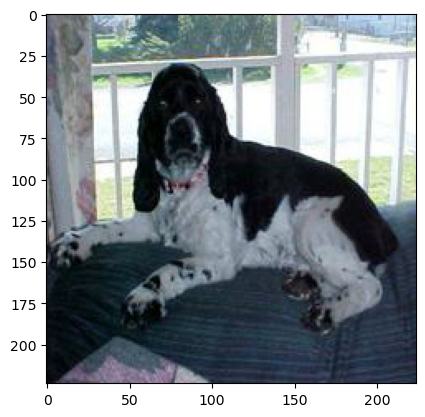

In [18]:
# display resized dog image
import matplotlib.pyplot as plt

img = mpimg.imread('resized_image/dog.7082.jpg')
imgplt = plt.imshow(img)
plt.show()

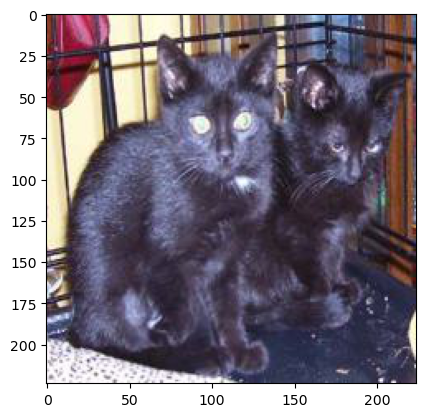

In [19]:
# display resized cat image
img = mpimg.imread('resized_image/cat.9466.jpg')
imgplt = plt.imshow(img)
plt.show()

# Creating labels for resized images of dogs and cats

In [20]:
# creaing a for loop to assign labels
filenames = os.listdir('resized_image/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:5])
print(len(filenames))

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg']
2000


In [22]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 0]
2000


In [24]:
# counting the images of dogs and cats out of 2000 images
import numpy as np

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 986 1014]


# Converting all the resized images to numpy arrays

In [25]:
import cv2
import glob

In [26]:
image_directory = 'resized_image/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[ 53  36  23]
   [ 43  26  13]
   [ 50  34  18]
   ...
   [231 190 165]
   [232 192 167]
   [233 193 168]]

  [[ 49  32  19]
   [ 39  22   9]
   [ 45  28  15]
   ...
   [232 191 166]
   [233 193 168]
   [234 194 169]]

  [[ 45  27  16]
   [ 36  18   7]
   [ 43  25  14]
   ...
   [231 190 165]
   [233 192 169]
   [232 194 170]]

  ...

  [[ 58  32  26]
   [ 62  36  29]
   [ 64  41  33]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]

  [[ 61  32  28]
   [ 60  34  28]
   [ 60  36  30]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]

  [[ 61  32  28]
   [ 56  29  25]
   [ 55  29  23]
   ...
   [ 82  56  40]
   [ 82  56  40]
   [ 82  56  40]]]


 [[[154 119  53]
   [149 114  41]
   [147 112  32]
   ...
   [172 115  46]
   [184 118  37]
   [194 123  36]]

  [[159 123  59]
   [152 116  46]
   [148 113  33]
   ...
   [178 119  49]
   [185 119  38]
   [193 122  34]]

  [[162 125  63]
   [154 117  49]
   [150 114  38]
   ...
   [181 124  49]
   [185 120  35]
   [192 122

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
Y = np.asarray(labels)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [33]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
print(X_train_scaled)

[[[[0.5372549  0.54117647 0.59607843]
   [0.49411765 0.50196078 0.54509804]
   [0.45882353 0.4745098  0.51764706]
   ...
   [0.46666667 0.5372549  0.56470588]
   [0.45098039 0.51764706 0.55294118]
   [0.44313725 0.50588235 0.55294118]]

  [[0.53333333 0.5372549  0.59215686]
   [0.49803922 0.50588235 0.54901961]
   [0.4627451  0.47843137 0.52156863]
   ...
   [0.4627451  0.53333333 0.56078431]
   [0.45490196 0.52156863 0.55686275]
   [0.45490196 0.51764706 0.56470588]]

  [[0.52941176 0.53333333 0.58823529]
   [0.50196078 0.50980392 0.55294118]
   [0.47058824 0.48627451 0.52941176]
   ...
   [0.47058824 0.53333333 0.56078431]
   [0.4627451  0.52941176 0.56470588]
   [0.46666667 0.53333333 0.56862745]]

  ...

  [[0.61176471 0.6627451  0.65490196]
   [0.61176471 0.66666667 0.65882353]
   [0.61960784 0.67058824 0.6627451 ]
   ...
   [0.61176471 0.6745098  0.67058824]
   [0.61176471 0.6745098  0.67058824]
   [0.61568627 0.67843137 0.6745098 ]]

  [[0.63529412 0.67843137 0.66666667]
   [0.6

# Building the Neural Network

In [35]:
import tensorflow as tf
import tensorflow_hub as hub

In [36]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

Metal device set to: Apple M2 Max


In [37]:
num_of_classes = 2

model_3 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [38]:
model_3.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [40]:
history_3=model_3.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


2023-04-08 23:45:27.050883: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 15s 221ms/step - loss: 0.1903 - acc: 0.9256
Epoch 2/5
50/50 [==============================] - 12s 234ms/step - loss: 0.0706 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 12s 247ms/step - loss: 0.0523 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 13s 261ms/step - loss: 0.0421 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 13s 267ms/step - loss: 0.0355 - acc: 0.9894


In [41]:
score_3, acc_3 = model_3.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score_3)
print('Test Accuracy =', acc_3)

13/13 [==============================] - 4s 258ms/step - loss: 0.0601 - acc: 0.9800
Test Loss = 0.060068994760513306
Test Accuracy = 0.9800000190734863


In [46]:
# import matplotlib.pyplot as plt

# # Plot accuracy
# plt.plot(history_3.history['acc'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()

# # Plot loss
# plt.plot(history_3.history['loss'])
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/5
40/40 [==============================] - 14s 341ms/step - loss: 0.2068 - acc: 0.9234 - val_loss: 0.0748 - val_acc: 0.9812
Epoch 2/5
40/40 [==============================] - 13s 316ms/step - loss: 0.0690 - acc: 0.9773 - val_loss: 0.0659 - val_acc: 0.9812
Epoch 3/5
40/40 [==============================] - 13s 324ms/step - loss: 0.0504 - acc: 0.9852 - val_loss: 0.0600 - val_acc: 0.9875
Epoch 4/5
40/40 [=======================

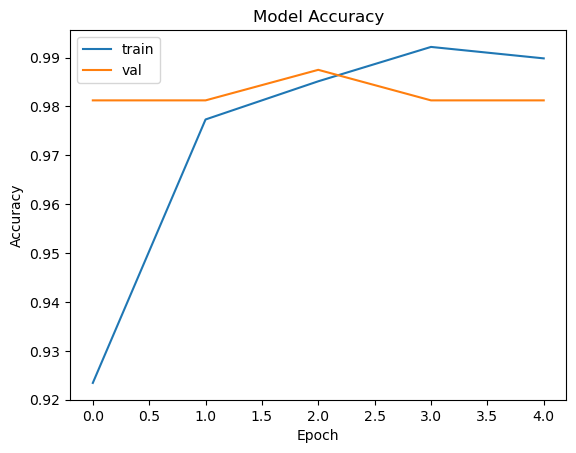

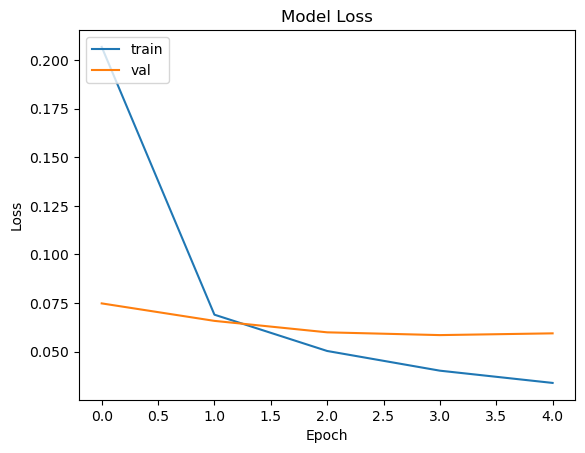

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=42)

# Define the number of classes
num_of_classes = 2

# Define the model architecture
model_3 = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

# Print the model summary
model_3.summary()

# Compile the model
model_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

# Train the model with validation
history_3 = model_3.fit(
    X_train, Y_train,
    epochs=5,
    validation_data=(X_val, Y_val)
)

# Evaluate the model on the test data
score_3, acc_3 = model_3.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score_3)
print('Test Accuracy =', acc_3)

# Plot accuracy
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()